In [2]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import keras
import tensorflow

In [3]:
from sklearn.datasets import load_wine

In [4]:
data=load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
X=data['data']
y=data['target']
names=data['feature_names']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
#class counts
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [7]:
n_classes = 3

In [8]:
np.mean(X,axis=0)

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [14]:
df=pd.DataFrame(X,columns=names)
df['cultivator']=y
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cultivator
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


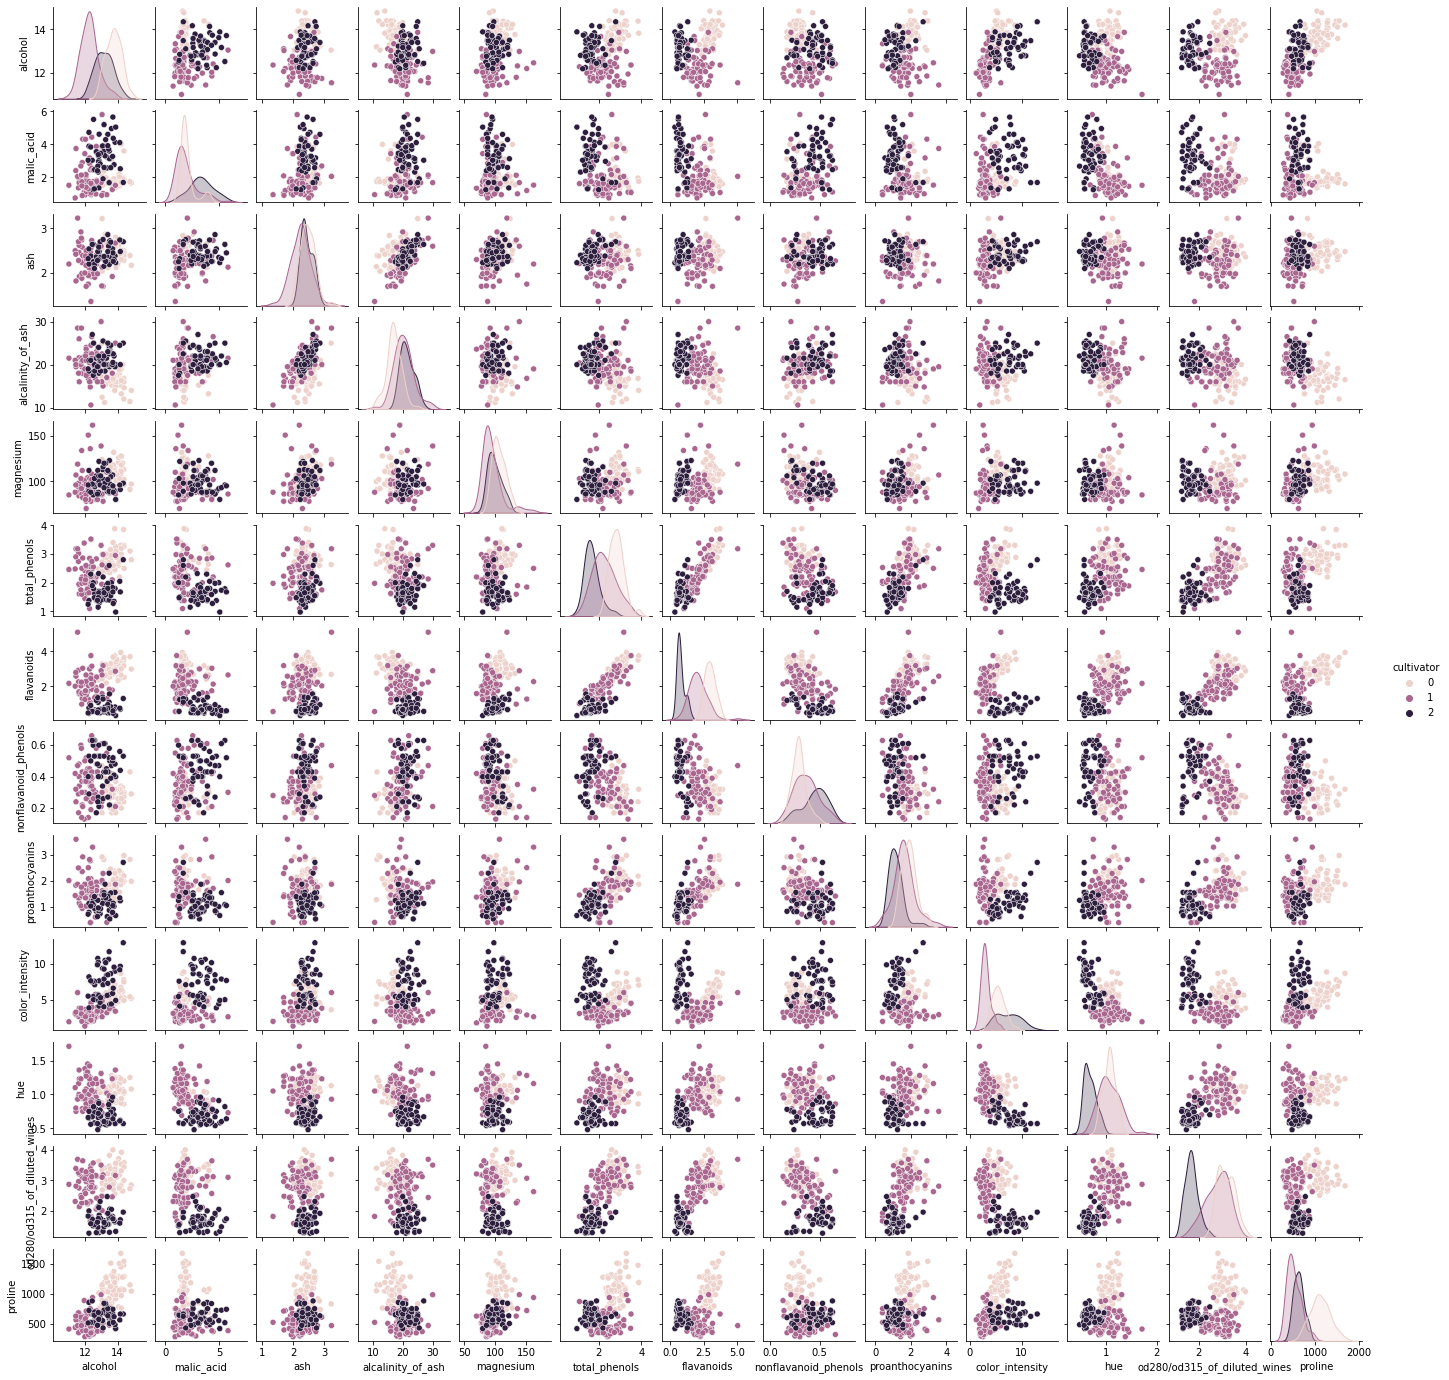

In [15]:
sb.pairplot(df,hue='cultivator',height=1.5)

In [9]:
np.random.seed(6542)
shuffled=np.arange(len(X))
np.random.shuffle(shuffled)
shuffled

array([ 75,  27,  38,   9, 138, 105, 168, 161,  33,  40,   0, 169, 139,
        59,   3, 131, 143,  91, 174, 142,   6,  86,  68,  85, 136, 167,
       119, 132,  16, 135, 163, 176,  48,  46, 112,  56, 164,  32,  64,
       118,  67,  77, 155, 111, 177, 144, 133,  24,  18,  17, 160, 110,
       173,  79,   8, 115,  70, 109, 129, 123, 141, 172,  62,  73, 100,
        69, 108, 103,  61,  37,  51, 102,  96, 113,   2,  83,  60, 146,
        54, 171,   5, 140,  44,  71, 127,  94,  14,  12,  43, 150,  28,
        58,  52,  11, 101, 134, 116,  20,  15,  30, 158, 126, 165, 170,
         7,  49,  23, 121,  13,  81,  10,  41,  47,  26, 130,  90, 148,
        35,  98, 151,  66,  92, 128,  82,  34,  63,  57, 153, 104,  29,
        39,   1, 120, 159,  93, 124, 166, 175, 157, 114,  78,  50,  36,
        95,  72, 137,  76,  53,  89,  31, 125, 149,  25, 145,  99, 152,
       162,  22,  74, 147,  97,  65,  80,  45, 106, 117,  88, 156,  21,
       154,   4,  42,  87, 107,  84,  19,  55, 122])

In [10]:
X=X[shuffled]
y=y[shuffled]

In [11]:
n_train=int(0.7*len(X))
n_train

124

In [12]:
X_train=X[:n_train]#this is python indexing
X_test=X[n_train:]
y_train=y[:n_train]
y_test=y[n_train:]

In [13]:
# standardize
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
np.mean(X_train, axis=0)

array([ 7.97211759e-15, -2.54276886e-16,  1.96527382e-15, -1.17468759e-15,
       -6.98366096e-17,  1.24318119e-15, -3.27247190e-16, -3.63508506e-16,
        3.78057800e-16,  2.73974392e-16, -5.06763090e-16, -1.04531079e-15,
        1.46835948e-16])

In [16]:
np.std(X_train, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
?LogisticRegression

In [17]:
logreg = LogisticRegression(penalty = 'none',
                           class_weight='balanced',
                           random_state=3754,#any number
                           max_iter=100,
                           )

In [18]:
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', penalty='none', random_state=3754)

In [19]:
y_pred=logreg.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,y_pred)

0.9814814814814815

In [22]:
acc={}
acc['logreg']=accuracy_score(y_test,y_pred)

In [25]:
logreg.coef_

array([[ 3.51664834,  2.09611835,  1.66312611, -5.83846329,  1.52770921,
         0.36938067,  3.30333284, -1.86153899,  0.85533249, -0.25758013,
         0.41289401,  3.84018735,  7.69172275],
       [-5.56763406, -1.99857436, -5.03669505,  3.96364757,  0.7909533 ,
        -1.85145239,  4.2294772 ,  4.04255765,  1.08678476, -8.05694332,
         4.91248099,  1.17751379, -8.7164457 ],
       [ 2.05098572, -0.09754399,  3.37356894,  1.87481572, -2.31866251,
         1.48207172, -7.53281005, -2.18101866, -1.94211726,  8.31452345,
        -5.325375  , -5.01770114,  1.02472295]])

In [69]:
y_test.shape

(54,)

In [70]:
y_pred.shape

(54,)

In [71]:
sklearn.__version__

'0.23.1'

In [23]:
coefs_df=pd.DataFrame(logreg.coef_,columns=names)

<AxesSubplot:>

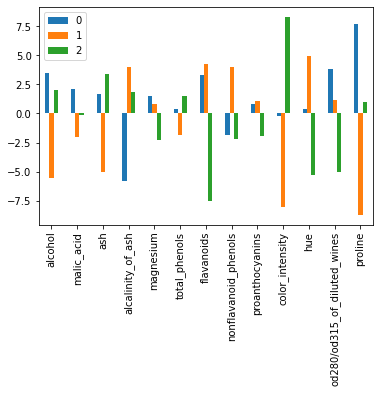

In [24]:
coefs_df.T.plot.bar()

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree = DecisionTreeClassifier()

In [27]:
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.8888888888888888

In [29]:
acc['tree'] = accuracy_score(y_test,y_pred)

In [30]:
from sklearn.tree import plot_tree

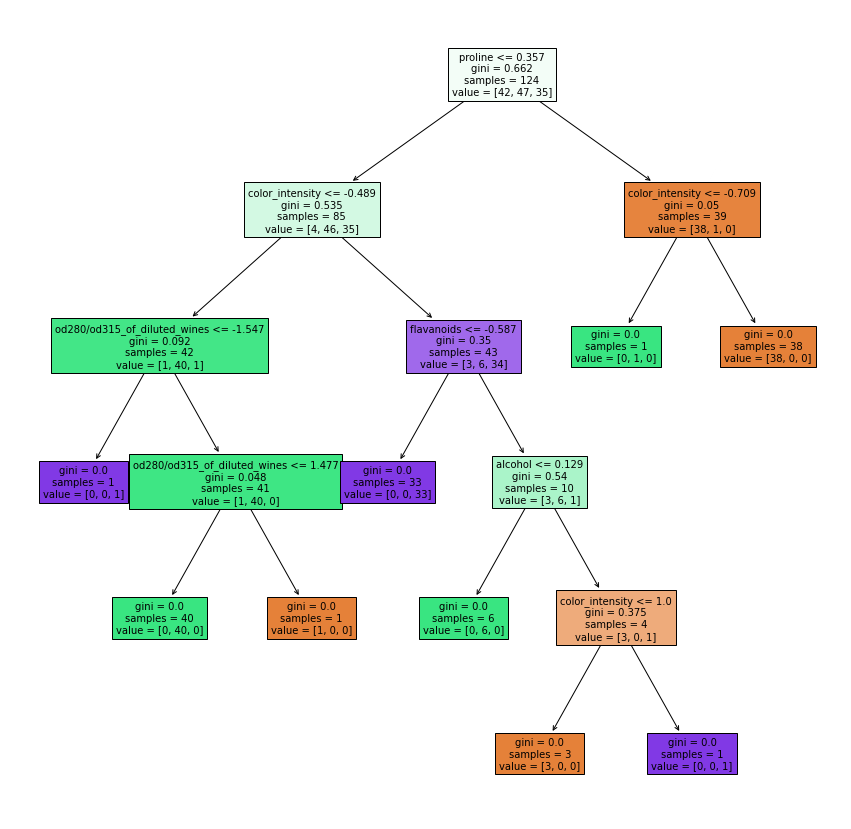

In [31]:
plt.figure(figsize=(15,15))
plot_tree(tree, filled=True, feature_names=names, fontsize=10)
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators=10,
                             max_depth=2,
                             random_state=3512)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)


0.9629629629629629

In [34]:
acc['rf']=accuracy_score(y_test,y_pred)

# Neural network

In [35]:
from keras.models import Sequential #simplest way to build model
from keras.layers import Dense # fully connected layer
from keras.optimizers import SGD #optimizer
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [36]:
y_train

array([1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 1,
       1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1])

In [37]:
y_train_cat=to_categorical(y_train)

In [38]:
np.random.seed(457)
tf.random.set_seed(2468)

In [39]:
model = Sequential()

model.add(Dense(units=10,activation='sigmoid', input_shape=X_train.shape[1:]))#hidden layer
model.add(Dense(units=n_classes, activation='softmax'))#softmax forces inputs between 0 and 1
model.compile(loss='categorical_crossentropy', optimizer = SGD(learning_rate=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [ ]:
?Dense

In [40]:
h=model.fit(X_train,y_train_cat, epochs=20, validation_split=0.2, batch_size=4)

Train on 99 samples, validate on 25 samples
Epoch 1/20
99/99 [==============================] - 0s 2ms/step - loss: 0.9958 - accuracy: 0.5556 - val_loss: 0.9855 - val_accuracy: 0.6000
Epoch 2/20
99/99 [==============================] - 0s 386us/step - loss: 0.9601 - accuracy: 0.6263 - val_loss: 0.9528 - val_accuracy: 0.6000
Epoch 3/20
99/99 [==============================] - 0s 500us/step - loss: 0.9268 - accuracy: 0.6667 - val_loss: 0.9219 - val_accuracy: 0.6800
Epoch 4/20
99/99 [==============================] - 0s 368us/step - loss: 0.8958 - accuracy: 0.7374 - val_loss: 0.8932 - val_accuracy: 0.7600
Epoch 5/20
99/99 [==============================] - 0s 338us/step - loss: 0.8669 - accuracy: 0.8081 - val_loss: 0.8671 - val_accuracy: 0.8000
Epoch 6/20
99/99 [==============================] - 0s 426us/step - loss: 0.8393 - accuracy: 0.7879 - val_loss: 0.8419 - val_accuracy: 0.8000
Epoch 7/20
99/99 [==============================] - 0s 420us/step - loss: 0.8142 - accuracy: 0.8384 - val_

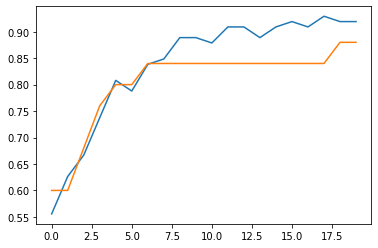

In [41]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

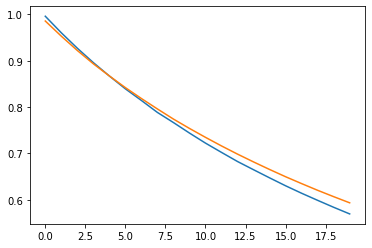

In [42]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [43]:
y_pred=np.argmax(model.predict(X_test),axis=1)

In [44]:
accuracy_score(y_test,y_pred)

0.9629629629629629

In [45]:
acc['nnet']=accuracy_score(y_test,y_pred)

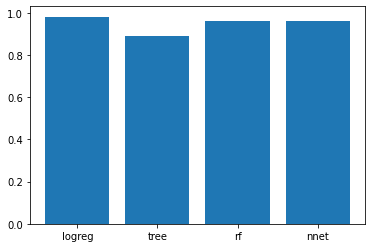

In [46]:
plt.bar(acc.keys(),acc.values())
plt.show()